In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

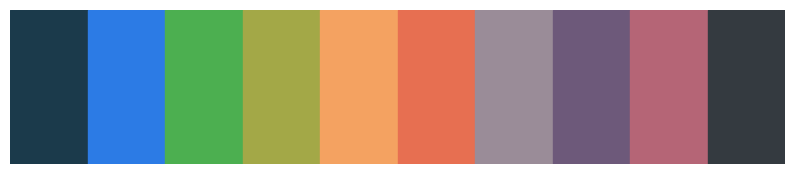

In [2]:


TAP20cb = [
    "#1B3A4B",  # Azul petróleo oscuro
    "#2C7BE5",  # Azul real
    "#4CAF50",  # Verde suave
    "#A3A847",  # Verde oliva SIN PENDIENTES
    "#F4A261",  # Naranja suave CON PENDIENTES
    "#E76F51",  # Coral elegante NO PASAN
    "#9A8C98",  # Gris malva
    "#6D597A",  # Púrpura apagado
    "#B56576",  # Rosa vino
    "#343A40"   # Gris carbón
]

# plot palette

def plot_palette(palette):
    n = len(palette)
    fig, ax = plt.subplots(figsize=(n, 2))
    for i, color in enumerate(palette):
        ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=color))
    ax.set_xlim(0, n)
    ax.set_ylim(0, 1)
    ax.axis('off')
    plt.show()

plot_palette(TAP20cb)

In [3]:
import pandas as pd

def resumen_curso(path_csv, latin1 = True, sep=",", c_categorie = -2, c_value = -1):
    """
    Lee un CSV de un curso y devuelve una tabla con:
    - cada categoría de la penúltima columna
    - la suma de la última columna para cada categoría
    """
    # Leer el CSV
    encoding = "latin1" if latin1 else "utf-8"
    df = pd.read_csv(path_csv, encoding=encoding, sep=sep)

    df = df[df['Municipi'] == 'BARCELONA']
    
    # Penúltima columna = categorías
    col_categoria = df.columns[c_categorie]
    # Última columna = valores numéricos (número de alumnos)
    col_valor = df.columns[c_value]
    
    # Agrupar y sumar
    resumen = (
        df.groupby(col_categoria)[col_valor]
          .sum()
          .reset_index()
          .rename(columns={col_categoria: "categories", col_valor: "total_students"})
    )
    
    return resumen


import pandas as pd

def unify_category(cat: str) -> str:
    
    if not isinstance(cat, str):
        return 'DESCONeguda'

    txt = cat.lower()

    # NO PROMOCIONA: repetir, no promocionen, certificats sense graduar, etc.
    if ('repet' in txt) or ('no promocionen' in txt) or ('han de repetir' in txt) or ('certificats sense graduar' in txt):
        return 'NO PROMOCIONA'

    # PROMO CON PENDIENTES
    if 'amb pendents' in txt:
        return 'PROMOCIONA AMB PENDENTS'

    # PROMO SIN PENDIENTES: sense pendents, al mes de juny/setembre…
    if ('sense pendents' in txt) or ('al mes de juny' in txt) or ('al mes de setembre' in txt):
        return 'PROMOCIONA SENSE PENDENTS'

    # Por si se cuela algo raro
    return 'ALTRE'


In [4]:
res1314 = resumen_curso("data_Ander/data_promotions_1314.csv", sep=";", c_categorie=-3, c_value=-1, latin1=True)
res1314 = res1314.drop(index=0)
res1314

,categories,total_students
1,Han de repetir,3827
2,Promo/gradua sense pendents juny,31827
3,Promo/gradua sense pendents setembre,7245
4,Promoció amb pendents,9335


In [5]:
res1415 = resumen_curso("data_Ander/data_promotions_1415.csv", sep=";", c_categorie=-3, c_value=-1 )
res1415 = res1415.drop(index=0)
res1415

,categories,total_students
1,HAN DE REPETIR,3729
2,PROMO/GRADUA SENSE PENDENTS JUNY,32386
3,PROMO/GRADUA SENSE PENDENTS SETEMBRE,7141
4,PROMOCIÓ AMB PENDENTS,9055


In [6]:
res1516 = resumen_curso("data_Ander/data_promotions_1516.csv", sep=",", c_categorie=-2, c_value=-1, latin1=True )
res1516 = res1516.drop(index=0)
res1516

,categories,total_students
1,Promo/gradua amb pendents,8816
2,Promo/gradua sense pendents juny,33702
3,Promo/gradua sense pendents setembre,7223
4,Repeteixen,3311


In [7]:
res1617 = resumen_curso("data_Ander/data_promotions_1617.csv", sep=",", c_categorie=-2, c_value=-1, latin1=True )
res1617 = res1617.drop(index=0)
res1617 

,categories,total_students
1,Promo/gradua amb pendents,8345.0
2,Promo/gradua sense pendents juny,35533.0
3,Promo/gradua sense pendents setembre,6525.0
4,Repeteixen,3081.0


In [8]:
res1718 = resumen_curso("data_Ander/data_promotions_1718.csv", sep=",", c_categorie=-2, c_value=-1, latin1=False)
res1718 = res1718.drop(index=[0, 5])
res1718

,categories,total_students
1,No promocionen,3094
2,Promocionen al mes de juny,36300
3,Promocionen al mes de setembre,6668
4,Promocionen amb pendents,8259


In [9]:
res1819 = resumen_curso("data_Ander/data_promotions_1819.csv", sep=";", c_categorie=-2, c_value=-1, latin1=False)
res1819 = res1819.drop(index=[0,5])
res1819

,categories,total_students
1,No promocionen,2595
2,Promocionen al mes de juny,38884
3,Promocionen al mes de setembre,6332
4,Promocionen amb pendents,7713


In [10]:
res1920 = resumen_curso("data_Ander/data_promotions_1920.csv", sep=";", c_categorie=-2, c_value=-1, latin1=False)
res1920 = res1920.drop(index=[0,5])
res1920

,categories,total_students
1,No promocionen,3306
2,Promocionen al mes de juny,36964
3,Promocionen al mes de setembre,8237
4,Promocionen amb pendents,7468


In [11]:
res2021 = resumen_curso("data_Ander/data_promotions_2021.csv", sep=";", c_categorie=-2, c_value=-1, latin1=False)
res2021 = res2021.drop(index=[0,5])
res2021

,categories,total_students
1,No promocionen,1401
2,Promocionen al mes de juny,42434
3,Promocionen al mes de setembre,6074
4,Promocionen amb pendents,5997


In [12]:
res2122 = resumen_curso("data_Ander/data_promotions_2122.csv", sep=";", c_categorie=-2, c_value=-1, latin1=False)
res2122 = res2122.drop(index=[0,5])
res2122

,categories,total_students
1,No promocionen,2026
2,Promocionen al mes de juny,38129
3,Promocionen al mes de setembre,8489
4,Promocionen amb pendents,7227


In [13]:
res2223 = resumen_curso("data_Ander/data_promotions_2223.csv", sep=";", c_categorie=-2, c_value=-1, latin1=True)
res2223

,categories,total_students
0,NO PROMOCIONEN,2276
1,PROMOCIONEN AMB PENDENTS,11828
2,PROMOCIONEN SENSE PENDENTS,43053


In [14]:
res2324 = resumen_curso("data_Ander/data_promotions_2324.csv", sep=";", c_categorie=-2, c_value=-1, latin1=True)
res2324

,categories,total_students
0,NO PROMOCIONEN,2246
1,PROMOCIONEN AMB PENDENTS,12095
2,PROMOCIONEN SENSE PENDENTS,43803


In [15]:
res_years = {
    "2013-14": res1314,
    "2014-15": res1415,
    "2015-16": res1516,
    "2016-17": res1617,
    "2017-18": res1718,
    "2018-19": res1819,
    "2019-20": res1920,
    "2020-21": res2021,
    "2021-22": res2122,
    "2022-23": res2223,
    "2023-24": res2324,
}

resum_anys = []

for anyo, df in res_years.items():
    df = df.copy()
    df['cat_unificada'] = df['categories'].apply(unify_category)
    tmp = (
        df.groupby('cat_unificada')['total_students']
          .sum()
          .reset_index()
    )
    tmp['Curso'] = anyo
    resum_anys.append(tmp)

resum_global = pd.concat(resum_anys, ignore_index=True)
cols = ['Curso'] + [c for c in resum_global.columns if c != 'Curso']
resum_global = resum_global[cols]

resum_global.to_csv("data_Ander/resum_global.csv", index=False, sep = ",")
resum_global
    

,Curso,cat_unificada,total_students
0,2013-14,NO PROMOCIONA,3827.0
1,2013-14,PROMOCIONA AMB PENDENTS,9335.0
2,2013-14,PROMOCIONA SENSE PENDENTS,39072.0
3,2014-15,NO PROMOCIONA,3729.0
4,2014-15,PROMOCIONA AMB PENDENTS,9055.0
5,2014-15,PROMOCIONA SENSE PENDENTS,39527.0
6,2015-16,NO PROMOCIONA,3311.0
7,2015-16,PROMOCIONA AMB PENDENTS,8816.0
8,2015-16,PROMOCIONA SENSE PENDENTS,40925.0
9,2016-17,NO PROMOCIONA,3081.0


In [16]:
pivot = resum_global.pivot(index='Curso',
                           columns='cat_unificada',
                           values='total_students')
pivot = pivot.sort_index()  # Orden por año
pivot
courses = pivot.index.tolist()


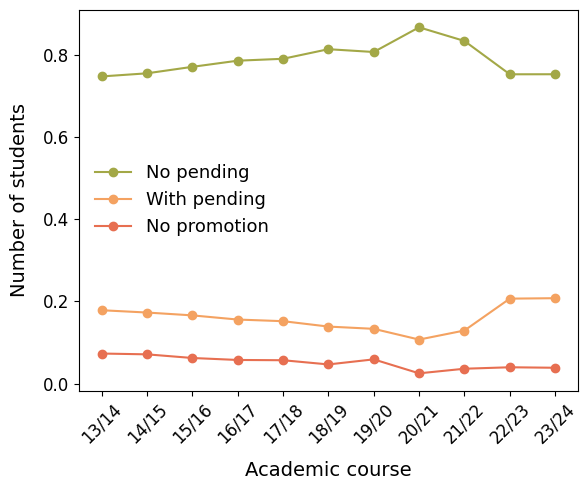

In [39]:
# Convertimos a proporciones
prop = pivot.div(pivot.sum(axis=1), axis=0)

courses = list(prop.index)  # ['2013-14','2014-15',...]

plt.figure(figsize=(6,5))

plt.plot(prop.index, prop['PROMOCIONA SENSE PENDENTS'], marker='o',
         label='No pending', color=TAP20cb[3])
plt.plot(prop.index, prop['PROMOCIONA AMB PENDENTS'], marker='o',
         label='With pending', color=TAP20cb[4])
plt.plot(prop.index, prop['NO PROMOCIONA'], marker='o',
         label='No promotion', color=TAP20cb[5])

# ----- cambiar formato de las etiquetas del eje X -----
# '2016-17' -> '16/17'
pretty_labels = [c[2:].replace('-', '/') for c in courses]
plt.xticks(ticks=range(len(courses)), labels=pretty_labels,
           rotation=45, fontsize=12)
# ------------------------------------------------------

plt.yticks(fontsize=12)
plt.xlabel("Academic course", labelpad=10, fontsize=14)
plt.ylabel("Number of students", labelpad=10, fontsize=14)

plt.legend(fontsize=13, frameon=False, loc = 'center left')

# sombreado COVID (usando posiciones 0..N-1)
covid_start = '2019-20'
covid_end   = '2021-22'

i_start = courses.index(covid_start)
i_end   = courses.index(covid_end)
# plt.axvspan(i_start, i_end, alpha=0.2, edgecolor='none')

# plt.text(0.678, 0.51, 'COVID-19',
#          horizontalalignment='center', verticalalignment='center',
#          transform=plt.gca().transAxes, fontsize=12)

plt.tight_layout()
plt.savefig("data_Ander/promotion_evolution.svg", dpi=300, bbox_inches='tight')
plt.show()


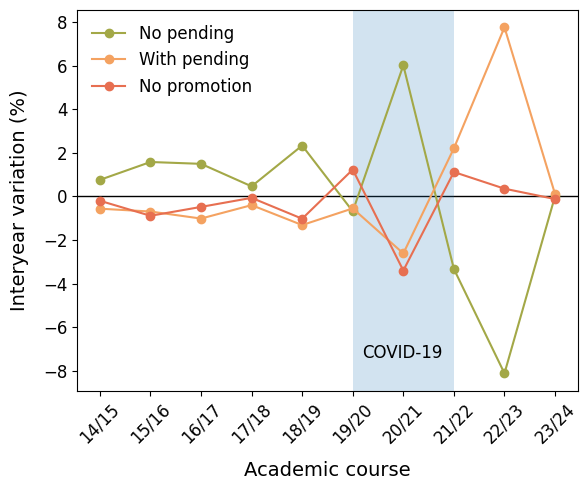

In [18]:
import matplotlib.pyplot as plt

# Diferencia interanual en proporciones
delta = prop.diff()

# Convertir a puntos porcentuales
delta_pct = delta * 100

plt.figure(figsize=(6,5))

# Sin pendientes
plt.plot(delta_pct.index, 
         delta_pct['PROMOCIONA SENSE PENDENTS'], 
         marker='o', linestyle='-', label='No pending', color = TAP20cb[3])

# Con pendientes
plt.plot(delta_pct.index, 
         delta_pct['PROMOCIONA AMB PENDENTS'], 
         marker='o', linestyle='-', label='With pending', color = TAP20cb[4])

# No promociona
plt.plot(delta_pct.index, 
         delta_pct['NO PROMOCIONA'], 
         marker='o', linestyle='-', label='No promotion', color = TAP20cb[5])

plt.axhline(0, color='black', linewidth=1, zorder = 1)
plt.xticks(rotation=45, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Academic course", labelpad=10, fontsize = 14)
plt.ylabel("Interyear variation (%)", fontsize = 14, labelpad = 10)
# plt.title("Variación interanual en porcentaje por categoría (ESO Barcelona)")
# plt.grid(alpha=0.3)
covid_start = '2019-20'
covid_end   = '2021-22'
pretty_labels = [c[2:].replace('-', '/') for c in courses]
plt.xticks(ticks=range(len(courses)), labels=pretty_labels,
           rotation=45, fontsize=12)
i_start = list(courses).index(covid_start)
i_end   = list(courses).index(covid_end)
plt.axvspan(i_start, i_end, alpha=0.2, edgecolor='none')
plt.legend(fontsize = 12, frameon = False)
plt.text(0.65, 0.1, 'COVID-19', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12)
plt.tight_layout()
plt.savefig("data_Ander/interyear_variation.svg", dpi=300, bbox_inches='tight')
plt.show()


Lo de promocionan en cada curso es del año anterior al que miramos. Es decir, si miramos un año concreto, son los que han promocionado a ese año

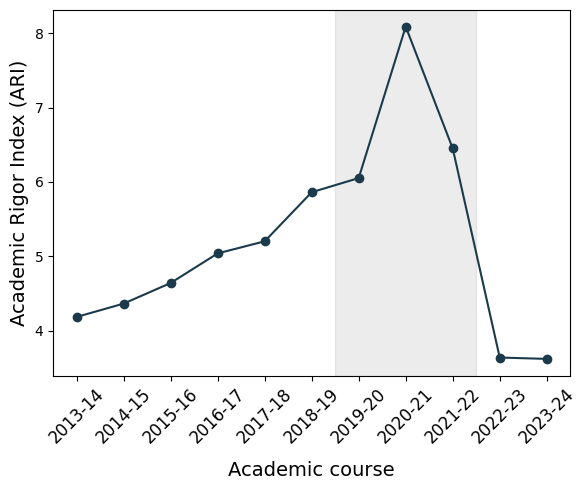

In [19]:
IRA = pivot['PROMOCIONA SENSE PENDENTS'] / pivot['PROMOCIONA AMB PENDENTS']

plt.figure(figsize=(6,5))
plt.plot(IRA.index, IRA, marker='o', color = TAP20cb[0])
plt.xticks(rotation=45, fontsize = 12)
plt.xlabel("Academic course", labelpad=10, fontsize = 14)
plt.ylabel("Academic Rigor Index (ARI)", fontsize = 14)
# plt.title("Evolución del rigor académico en ESO Barcelona")
covid_start = '2019-20'
covid_end   = '2021-22'

i_start = list(courses).index(covid_start)
i_end   = list(courses).index(covid_end)
plt.axvspan(i_start-0.5, i_end+0.5, color='grey', alpha=0.15, label='COVID-19 period')
plt.grid(False)
plt.tight_layout()
plt.show()


In [20]:
initial_evaluation = pd.read_csv("data_Ander/initial_evaluation.csv", sep=",", quotechar='"')
initial_evaluation_barcelona = initial_evaluation[initial_evaluation['ÀREA TERRITORIAL'].str.contains('barcelona', case=False, na=False)]
initial_evaluation_barcelona = initial_evaluation_barcelona[initial_evaluation_barcelona['ÀREA TERRITORIAL'] != 'Barcelona Comarques']
initial_evaluation_barcelona = initial_evaluation_barcelona.drop(columns = ['CODI_ALUMNE','GENERE', 'MES_NAIXEMENT', 'ANY_NAIXEMENT', 'NATURALESA', 'ÀREA TERRITORIAL', 'HÀBITAT'])
initial_evaluation_barcelona.to_csv("data_Ander/initial_evaluation_barcelona.csv", index=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_13620\4027695101.py:1: DtypeWarning: Columns (3,6,10,11,12,13,14,16,18,19,20,21,22,25,26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  initial_evaluation = pd.read_csv("data_Ander/initial_evaluation.csv", sep=",", quotechar='"')


In [21]:
import pandas as pd

# Leer el archivo, indicando que no trate la coma como separador decimal
initial_evaluation_barcelona = pd.read_csv("data_Ander/initial_evaluation_barcelona.csv", sep=",")

# Reemplazar comas decimales por puntos en TODAS las columnas excepto 'ANY' y 'CODI_ALUMNE'
cols_notas = [col for col in initial_evaluation_barcelona.columns if col not in ['ANY']]

initial_evaluation_barcelona[cols_notas] = initial_evaluation_barcelona[cols_notas].replace(',', '.', regex=True)

# Convertir a numérico (las celdas vacías pasan a NaN automáticamente)
initial_evaluation_barcelona[cols_notas] = initial_evaluation_barcelona[cols_notas].apply(pd.to_numeric, errors='coerce')
initial_evaluation_barcelona['PROMEDIO'] = initial_evaluation_barcelona[cols_notas].mean(axis=1, skipna=True)
promedio_evaluation = initial_evaluation_barcelona[['ANY', 'PROMEDIO']]
promedio_evaluation.head()


C:\Users\Admin\AppData\Local\Temp\ipykernel_13620\4101118560.py:4: DtypeWarning: Columns (2,5,9,10,13,20,21,24,25,26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  initial_evaluation_barcelona = pd.read_csv("data_Ander/initial_evaluation_barcelona.csv", sep=",")


,ANY,PROMEDIO
0,2023,76.838421
1,2023,70.812632
2,2023,66.118421
3,2023,91.410000
4,2023,68.545789


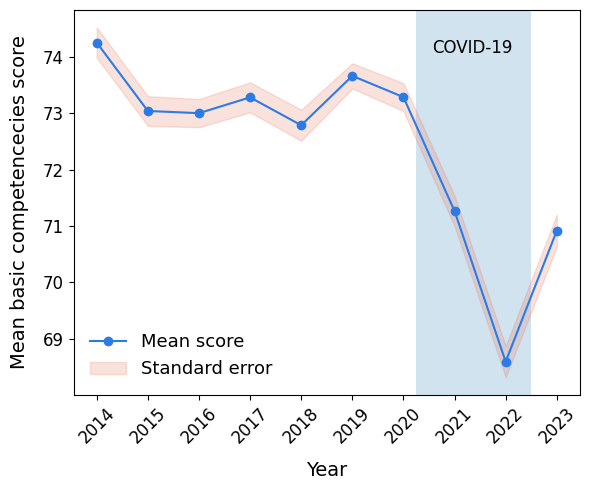

In [22]:
promedio_desviacion_por_anyo = (
    promedio_evaluation
    .groupby('ANY')['PROMEDIO']
    .agg(['mean', 'std', 'count'])
    .reset_index()
)

promedio_desviacion_por_anyo['sem'] = (
    promedio_desviacion_por_anyo['std'] / np.sqrt(promedio_desviacion_por_anyo['count'])
)

promedio_desviacion_por_anyo
df = promedio_desviacion_por_anyo


df = df[~df['ANY'].isin([2012, 2013])].reset_index(drop=True)
x = df['ANY']
y = df['mean']
err = df['sem']*1.96    # o df['std'] si quieres la dispersión total

plt.figure(figsize=(6,5))

# Línea principal
plt.plot(x, y, marker='o', color=TAP20cb[1], label='Mean score')

# Banda de error (sombra)
plt.fill_between(
    x,
    y - err,
    y + err,
    alpha=0.2,
    color=TAP20cb[5],
    label='Standard error'
)

# plt.errorbar(
#     x,
#     y,
#     yerr=err,
#     fmt='o',
#     color=TAP20cb[0],
#     ecolor=TAP20cb[2],
#     capsize=5,
#     label='Standard error'
# )

plt.xlabel("Year", fontsize = 14, labelpad=10)
plt.ylabel("Mean basic competencecies score", fontsize = 14, labelpad=10)
# plt.title("Evolution of the mean score with error band")
# plt.grid(alpha=0.3)
plt.xticks([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], rotation=45, fontsize = 12)
plt.axvspan(2020.25, 2022.5,              # de año 2020 a 2022 
           alpha=0.2, 
           edgecolor= 'none',
           zorder=0
           )
plt.yticks(fontsize = 12)
plt.text(0.787, 0.9, 'COVID-19', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12)

plt.legend(frameon = False, fontsize = 13)
plt.tight_layout()
plt.savefig("data_Ander/mean_score_evolution.svg", dpi=300, bbox_inches='tight')
plt.show()


In [23]:
import pandas as pd
import numpy as np

base_path = "data_Ander"
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

resultados = []

for year in years:
    print(f"Procesando {year}...")

    file_pad   = f"{base_path}/{year}_pad_mdbas.csv"
    file_renda = f"{base_path}/{year}_renda.csv"

    # --- LEER DATOS ---
    df_pad   = pd.read_csv(file_pad)
    df_renda = pd.read_csv(file_renda)

    # --- POBLACIÓN POR BARRIO ---
    df_pad = df_pad.rename(columns={"Valor": "Poblacion"})
    pop_barri = (
        df_pad
        .groupby(["Codi_Districte", "Codi_Barri", "Nom_Barri"], as_index=False)["Poblacion"]
        .sum()
    )

    # --- RENTA MEDIA POR BARRIO (media simple de secciones) ---
    renta_barri = (
        df_renda
        .groupby(["Codi_Districte", "Codi_Barri", "Nom_Barri"], as_index=False)["Import_Euros"]
        .mean()
        .rename(columns={"Import_Euros": "Renta_barri"})
    )

    # --- UNIR POBLACIÓN + RENTA POR BARRIO ---
    df_barris = pop_barri.merge(
        renta_barri,
        on=["Codi_Districte", "Codi_Barri", "Nom_Barri"],
        how="inner"
    )

    # --- MÉTRICAS PONDERADAS POR POBLACIÓN ---
    # Renta media ponderada
    total_pop = df_barris["Poblacion"].sum()
    df_barris["weighted_renta"] = df_barris["Renta_barri"] * df_barris["Poblacion"]
    mean_renta = df_barris["weighted_renta"].sum() / total_pop

    # Varianza y desviación estándar ponderadas
    diff = df_barris["Renta_barri"] - mean_renta
    weighted_var = (diff**2 * df_barris["Poblacion"]).sum() / total_pop
    weighted_std = np.sqrt(weighted_var)

    # Error estándar de la media (opcional)
    sem = weighted_std / np.sqrt(total_pop)

    resultados.append({
        "Año": year,
        "Renta_media_real": mean_renta,
        "STD_ponderada": weighted_std,
        "SEM": sem
    })

# DataFrame final
df_renta_stats = (
    pd.DataFrame(resultados)
      .sort_values("Año")
      .reset_index(drop=True)
)

df_renta_stats


Procesando 2015...
Procesando 2016...
Procesando 2017...
Procesando 2018...
Procesando 2019...
Procesando 2020...
Procesando 2021...
Procesando 2022...


,Año,Renta_media_real,STD_ponderada,SEM
0,2015,20498.628284,5060.398118,4.047210
1,2016,21163.638991,5706.417808,4.555448
2,2017,21375.299426,5970.015191,4.744086
3,2018,21676.366135,6080.045329,4.824865
4,2019,22695.558397,6609.024997,5.210715
5,2020,21047.728509,5942.049990,4.661163
6,2021,22084.420560,5371.366899,4.221768
7,2022,23160.040832,5784.574477,4.574078


C:\Users\Admin\AppData\Local\Temp\ipykernel_13620\1211699662.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(frameon = False, fontsize = 12)


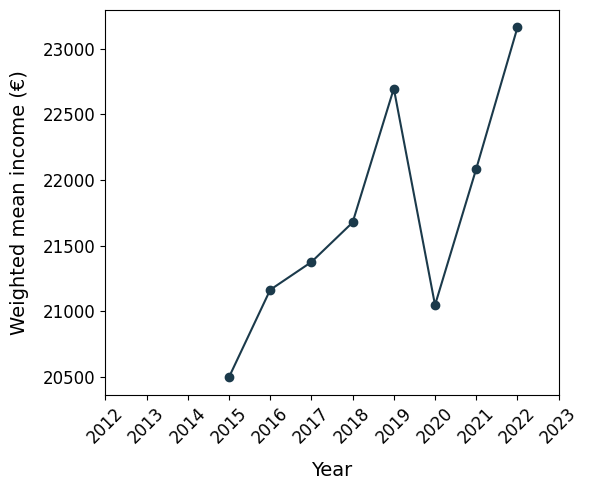

In [24]:
plt.figure(figsize=(6,5))
plt.plot(df_renta_stats['Año'], df_renta_stats['Renta_media_real'], marker='o', color = TAP20cb[0])
plt.xlabel("Year", fontsize = 14, labelpad=10)
plt.ylabel("Weighted mean income (€)", fontsize = 14, labelpad=10)
# plt.title("Evolution of the mean score with error band")
# plt.grid(alpha=0.3)
plt.xticks([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], rotation=45, fontsize = 12)
# plt.axvspan(2020.25, 2022.5,              # de año 2020 a 2022 
#            alpha=0.2, 
#            edgecolor= 'none',
#               zorder=0
#               )
plt.yticks(fontsize = 12)
# plt.text(0.785, 0.9, 'COVID-19', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12)
plt.legend(frameon = False, fontsize = 12)
plt.tight_layout()
plt.show()

In [32]:
import pandas as pd

# --- 1. Cargar archivo ---
df_idon = pd.read_csv("data_Ander/idoneidad_index.csv")


# --- 2. Extraer el año inicial del curso ---
df_idon["Año"] = df_idon["Curs"].str[:4].astype(int)

# --- 3. Seleccionar columnas de idoneidad ---
cols_idoneidad = [
    "1r (12 anys)",
    "2n (13 anys)",
    "3r (14 anys)",
    "4t (15 anys)"
]

# --- 4. Convertir a número (por si hay comas como decimales) ---
df_idon[cols_idoneidad] = (
    df_idon[cols_idoneidad]
    .replace(",", ".", regex=True)
    .apply(pd.to_numeric, errors="coerce")
)

# --- 5. Calcular la media del índice ---
df_idon["Idoneidad_media"] = df_idon[cols_idoneidad].mean(axis=1)

# --- 6. Crear nuevo dataframe limpio ---
df_idoneidad_media = df_idon[["Año", "Idoneidad_media"]].sort_values("Año").reset_index(drop=True)

df_idoneidad_media
df_idon


,Curs,1r (12 anys),2n (13 anys),3r (14 anys),4t (15 anys),Año,Idoneidad_media
0,2024- 2025,93.9,91.4,89.2,85.8,2024,90.075
1,2023- 2024,93.6,91.6,88.4,86.8,2023,90.100
2,2022- 2023,93.2,90.3,88.9,85.1,2022,89.375
3,2021- 2022,92.0,90.7,87.2,85.7,2021,88.900
4,2020- 2021,92.5,89.0,86.1,83.8,2020,87.850
5,2019- 2020,93.6,90.6,87.5,83.0,2019,88.675
6,2018- 2019,93.0,90.2,86.4,81.5,2018,87.775
7,2017- 2018,92.8,89.1,85.1,80.4,2017,86.850
8,2016- 2017,92.3,88.6,84.5,79.0,2016,86.100
9,2015- 2016,92.2,88.0,83.1,77.6,2015,85.225


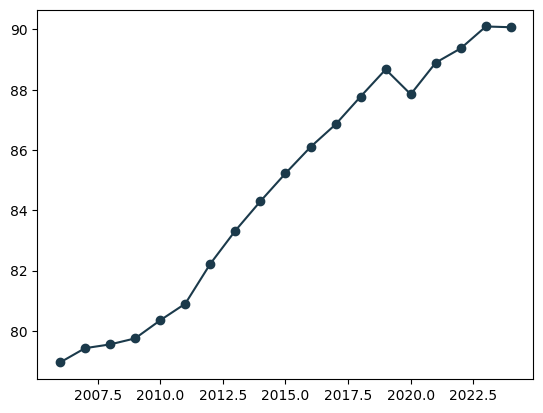

In [26]:
plt.plot(df_idoneidad_media['Año'], df_idoneidad_media['Idoneidad_media'], marker='o', color = TAP20cb[0])

In [27]:
ist = pd.read_csv("data_Ander/ist.csv", sep = ';')
ist = ist.drop(columns = ['municipio', 'concepto', 'estado'])
ist

,año,valor
0,2015,109.0
1,2016,108.9
2,2017,108.6
3,2018,108.5
4,2019,108.0
5,2020,107.1
6,2021,107.2
7,2022,107.5


In [28]:
import pandas as pd

# 1) Dejar nombres coherentes
ist = ist.rename(columns={"año": "Año", "valor": "IST"})
df_renta_simple = df_renta_stats[["Año", "Renta_media_real"]]
df_idon_simple = df_idoneidad_media[["Año", "Idoneidad_media"]]

# 2) Unir por año (solo se quedarán 2015–2022 porque es lo que comparten todos)
df_soc = (
    df_renta_simple
    .merge(ist, on="Año")
    .merge(df_idon_simple, on="Año")
    .sort_values("Año")
    .reset_index(drop=True)
)

df_soc


,Año,Renta_media_real,IST,Idoneidad_media
0,2015,20498.628284,109.0,85.225
1,2016,21163.638991,108.9,86.100
2,2017,21375.299426,108.6,86.850
3,2018,21676.366135,108.5,87.775
4,2019,22695.558397,108.0,88.675
5,2020,21047.728509,107.1,87.850
6,2021,22084.420560,107.2,88.900
7,2022,23160.040832,107.5,89.375


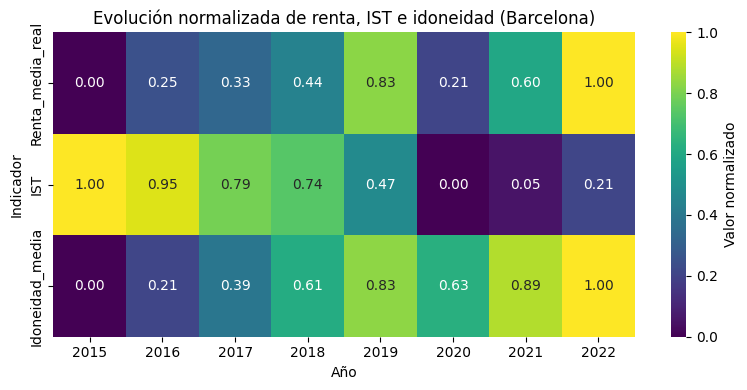

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Normalización min-max por columna
cols = ["Renta_media_real", "IST", "Idoneidad_media"]
df_norm = df_soc.copy()

for c in cols:
    col = df_soc[c]
    df_norm[c] = (col - col.min()) / (col.max() - col.min())

# Construir matriz para el mapa de calor (filas = indicadores, columnas = años)
heat_data = df_norm.set_index("Año")[cols].T  # transponemos para que filas sean variables

plt.figure(figsize=(8, 4))
sns.heatmap(
    heat_data,
    annot=True, fmt=".2f",
    cmap="viridis",
    cbar_kws={"label": "Valor normalizado"}
)

plt.ylabel("Indicador")
plt.xlabel("Año")
plt.title("Evolución normalizada de renta, IST e idoneidad (Barcelona)")
plt.tight_layout()
plt.show()


In [30]:
import numpy as np
from matplotlib.colors import to_rgb, to_hex

from matplotlib.colors import ListedColormap

# Tu función tal cual
def crear_gradiente(color_inicio, color_fin, n=20):
    c1 = np.array(to_rgb(color_inicio))
    c2 = np.array(to_rgb(color_fin))
    gradiente = [
        to_hex(c1 + (c2 - c1) * i / (n - 1))
        for i in range(n)
    ]
    return gradiente

# 1) Lista de colores
my_colors = crear_gradiente(TAP20cb[1], TAP20cb[5], n=100)

# 2) Convertir a colormap
my_cmap = ListedColormap(my_colors, name="my_cmap")


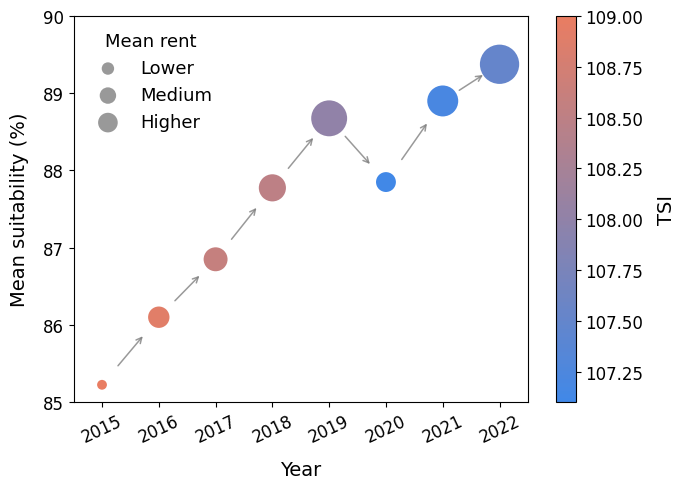

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Aseguramos tipo int
df_soc["Año"] = df_soc["Año"].astype(int)

# Escalado de tamaños (renta)
renta = df_soc["Renta_media_real"]
renta_norm = (renta - renta.min()) / (renta.max() - renta.min())

size_min, size_max = 50, 800   # ajusta si quieres más/menos contraste
sizes = size_min + renta_norm * (size_max - size_min)

ist = df_soc["IST"].values   # tus valores de IST
ref = 100.0                  # referencia Cataluña

# Distancia máxima al valor de referencia
delta = np.max(np.abs(ist - ref))
# Transformación a [0, 1] con 0.5 en la referencia
df_soc["IST_scaled"] = 0.5 + (df_soc["IST"] - ref) / (2 * delta)

# Si quieres asegurarte de que no se sale por redondeos numéricos:
df_soc["IST_scaled"] = df_soc["IST_scaled"].clip(0, 1)
fig, ax = plt.subplots(figsize=(7, 5))

# Ahora: X = Año, color = IST
sc = ax.scatter(
    df_soc["Año"],
    df_soc["Idoneidad_media"],
    c=df_soc["IST"],        # <<< gradiente de color por IST
    s=sizes,
    cmap=my_cmap,           # tu colormap de dos colores
    alpha=0.9,
    edgecolor="none",
    linewidth=0.7
)

# ---------- FLECHAS ENTRE AÑOS (orden temporal) ----------
df_sorted = df_soc.sort_values("Año")

xs = df_sorted["Año"].values
ys = df_sorted["Idoneidad_media"].values

frac = 0.25  # margen en cada extremo para que no toque las burbujas

for i in range(len(xs) - 1):
    x0, y0 = xs[i], ys[i]
    x1, y1 = xs[i + 1], ys[i + 1]
    dx, dy = x1 - x0, y1 - y0
    dist = np.hypot(dx, dy)
    if dist == 0:
        continue

    x_start = x0 + frac * dx
    y_start = y0 + frac * dy
    x_end   = x1 - frac * dx
    y_end   = y1 - frac * dy

    ax.annotate(
        "",
        xy=(x_end, y_end),
        xytext=(x_start, y_start),
        arrowprops=dict(
            arrowstyle="->",
            color="gray",
            lw=1.1,
            alpha=0.8
        )
    )
# -------------------------------------------------------

# # Etiquetar años COVID
# for _, row in df_soc.iterrows():
#     if row["Año"] in [2019, 2020, 2021]:
#         # Colocar etiquetas arriba para 2019 y 2020, abajo para 2021
#         if row["Año"] == 2019 or row["Año"] == 2021:
#             ax.text(
#                 row["Año"],
#                 row["Idoneidad_media"] + 0.3,
#                 str(int(row["Año"])),
#                 fontsize=11,
#                 ha="center"
#             )
#         else:
#             ax.text(
#                 row["Año"],
#                 row["Idoneidad_media"] - 0.4,
#                 str(int(row["Año"])),
#                 fontsize=11,
#                 ha="center"
#             )

# Barra de color para el IST
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label("TSI", fontsize=14, labelpad=10)
cbar.ax.tick_params(labelsize=12)

ax.set_xlabel("Year", fontsize=14, labelpad=10)
ax.set_ylabel("Mean suitability (%)", fontsize=14, labelpad=10)

# Leyenda para el tamaño (renta)
for frac_leg, label in zip([0.4, 0.7, 1.0], ["Lower", "Medium", "Higher"]):
    ax.scatter([], [], s=200 * frac_leg, c="black",
               alpha=0.4, edgecolor="none", label=label)
ax.legend(title="Mean rent", loc="best", frameon=False,
          fontsize=13, title_fontsize=13)

plt.xticks(df_soc["Año"], fontsize=12, rotation=25)  # ticks en años enteros
plt.yticks(fontsize=12)
plt.ylim(85, 90)  # ajusta si hace falta
plt.xlim(df_soc["Año"].min() - 0.5, df_soc["Año"].max() + 0.5)
plt.tight_layout()
plt.savefig("data_Ander/idoneity_evolution.svg", dpi=300, bbox_inches='tight')
plt.show()
